# k-Nearest Neighbors

#### Import libraries

In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.tree import DecisionTreeClassifier

# Set SEED
SEED = 1

# Problem 7.2 Personal Loan Acceptance

Universal Bank is a relatively young bank growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers (depositors) with varying sizes of relationship with the bank. The customer base of asset customers (borrowers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal is to use
k-NN to predict whether a new customer will accept a loan offer. This will serve as the basis for the design of a new campaign.

The file _UniversalBank.csv_ contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Create a dataframe for the `UniversalBank.csv` data**

Drop the `ID` and `Zip Code` variables and replace blanks (" ") with `_`.

Display the dataframe info and first 5 rows of data.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [2]:
bank_df = pd.read_csv(os.path.join('..', 'data', 'UniversalBank.csv'))
bank_df = bank_df.drop(columns=['ID' ,'ZIP Code'])
bank_df.columns = [c.replace(' ','_') for c in bank_df.columns]
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [3]:
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<h3 style="color:teal"> Expected Output: </h3>

**Run descriptive statistics on data.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [4]:
bank_df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<h3 style="color:teal"> Expected Output: </h3>

**Create dummy columns for categorical variables.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [5]:
bank_df['Education'] = bank_df['Education'].astype('category')
bank_df2 = pd.get_dummies(bank_df, prefix_sep='_', drop_first=False, dtype='int8')
bank_df2.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


<h3 style="color:teal"> Expected Output: </h3>

**Partition the data into training (80%) and testing (20%) sets.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [6]:
target = 'Personal_Loan'
predictors = list(bank_df2.drop(target, axis=1).columns)
X = bank_df2[predictors]
y = bank_df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)

print('Training Data: ', X_train.shape)
print('Testing Data: ', X_test.shape)

Training Data:  (4000, 13)
Testing Data:  (1000, 13)


<h3 style="color:teal"> Expected Output: </h3>

**Create a dataframe for a new customer with the following characteristics:**

- `Age`: 40
- `Experience`: 10
- `Income`: 84
- `Family`: 2
- `CCAvg`: 2
- `Mortgage`: 0
- `Securities_Account`: 0
- `CD_Account`: 0
- `Online`: 1
- `CreditCard`: 1
- `Education_1`: 0
- `Education_2`: 1
- `Education_3`: 0

<h4 style="color:blue"> Write Your Code Below: </h4>

In [7]:
new_df = pd.DataFrame([{'Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 
                        'CCAvg': 2, 'Mortgage': 0, 'Securities_Account': 0, 
                        'CD_Account': 0, 'Online': 1, 'CreditCard': 1, 
                        'Education_1': 0, 'Education_2': 1, 'Education_3': 0}],
                      columns=predictors)
new_df

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,40,10,84,2,2,0,0,0,1,1,0,1,0


<h3 style="color:teal"> Expected Output: </h3>

In [8]:
new_df = pd.DataFrame([{'Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 
                        'CCAvg': 2, 'Mortgage': 0, 'Securities_Account': 0, 
                        'CD_Account': 0, 'Online': 1, 'CreditCard': 1, 
                        'Education_1': 0, 'Education_2': 1, 'Education_3': 0}],
                      columns=predictors)
new_df

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,40,10,84,2,2,0,0,0,1,1,0,1,0


**Normalize the training, tesing data, and new customer data with the transformation using the training data only.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [9]:
scaler = preprocessing.StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

print('Training Data: ', X_train_norm.shape)
print('Testing Data: ', X_test_norm.shape)

new_df_norm = pd.DataFrame(scaler.transform(new_df),
                           columns=predictors)
new_df_norm

Training Data:  (4000, 13)
Testing Data:  (1000, 13)


,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,-0.466529,-0.880689,0.225962,-0.346703,0.037271,-0.555648,-0.338403,-0.252646,0.828028,1.541275,-0.848782,1.590739,-0.651538


<h3 style="color:teal"> Expected Output: </h3>

**Run kNN for 1 nearest neighbor and make prediction for new customer.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [10]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_norm, y_train)
knn.predict(new_df_norm.values)[0]

0

<h3 style="color:teal"> Expected Output: </h3>

New customer is predicted to not accept a loan offer.

**Evaluate different k values using accuracy, precision, and recall metrics**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [11]:
def plot_results(results):
    fig, axes = plt.subplots(1,3, figsize=(12,4))
    metrics = ['accuracy', 'precision', 'recall']
    axes = axes.flatten()
    for i, metric in enumerate(metrics):
        ax = axes[i]
        sns.lineplot(x = results_df['k'], y = results_df[metric], 
                     marker = 'o', ax=ax)
        ax.set_xticks(list(results_df['k']))
        ax.set_xlabel("k Values")
        ax.set_ylabel(metric.capitalize())
        plt.tight_layout()

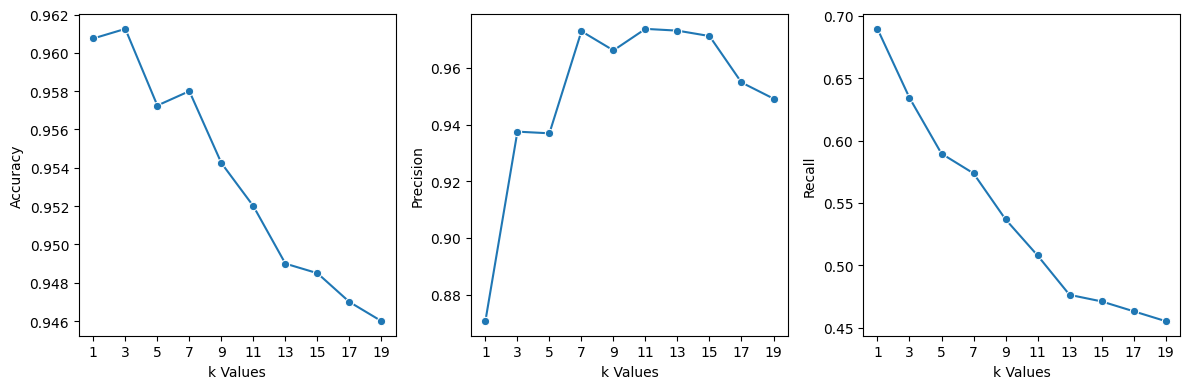

In [12]:
k_values = range(1, 20, 2)
results = []
cv = 4
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train_norm, y_train, 
                               scoring='accuracy', cv=cv)
    precision = cross_val_score(knn, X_train_norm, y_train, 
                                scoring='precision', cv=cv)
    recall = cross_val_score(knn, X_train_norm, y_train, 
                             scoring='recall', cv=cv)
    results.append({'k': k, 
                    'accuracy': np.mean(accuracy),
                    'precision': np.mean(precision),
                    'recall': np.mean(recall)
                   })
results_df = pd.DataFrame(results)
plot_results(results_df)

<h3 style="color:teal"> Expected Output: </h3>

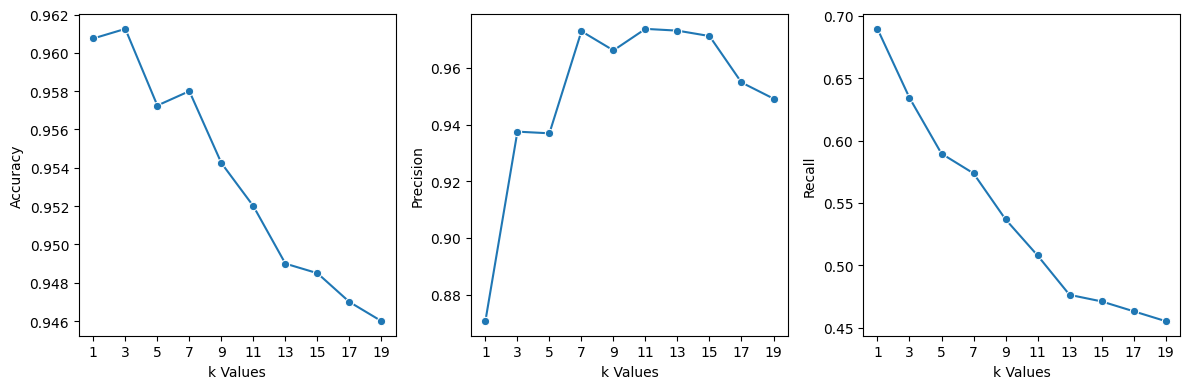

**Display evaluation metrics and confusion matrix for optimal k value on the training data.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [13]:
def plot_confusion_matrix(clf, x, y, ax, title):
    ConfusionMatrixDisplay.from_estimator(clf, x, y, 
                                          cmap=plt.cm.Blues, colorbar=False, ax=ax)
    plt.title(title)
    plt.tight_layout()

In [15]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_norm, y_train)

knn_preds1 = knn.predict(X_train_norm)
print('Accuracy :', accuracy_score(y_train, knn_preds1))
print('Precision :', precision_score(y_train, knn_preds1))
print('Recall :', recall_score(y_train, knn_preds1))

Accuracy : 0.96825
Precision : 0.9922178988326849
Recall : 0.6710526315789473


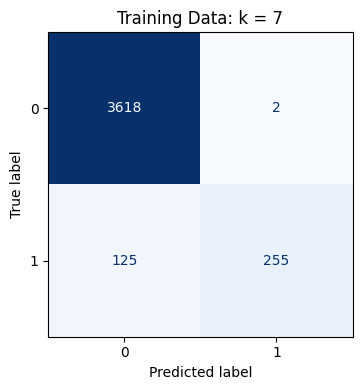

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(knn, X_train_norm, y_train, ax, f'Training Data: k = {k}')

<h3 style="color:teal"> Expected Output: </h3>

In [17]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_norm, y_train)

knn_preds1 = knn.predict(X_train_norm)
print('Accuracy :', accuracy_score(y_train, knn_preds1))
print('Precision :', precision_score(y_train, knn_preds1))
print('Recall :', recall_score(y_train, knn_preds1))

Accuracy : 0.96825
Precision : 0.9922178988326849
Recall : 0.6710526315789473


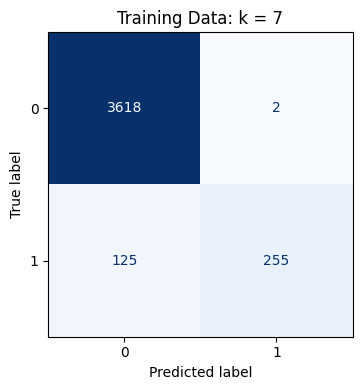

In [18]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(knn, X_train_norm, y_train, ax, f'Training Data: k = {k}')

**Display evaluation metrics and confusion matrix for optimal k value on the testing data.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [19]:
knn_preds2 = knn.predict(X_test_norm)
print('Accuracy :', accuracy_score(y_test, knn_preds2))
print('Precision :', precision_score(y_test, knn_preds2))
print('Recall :', recall_score(y_test, knn_preds2))

Accuracy : 0.955
Precision : 0.9508196721311475
Recall : 0.58


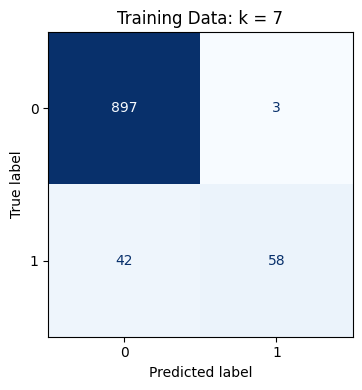

In [20]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(knn, X_test_norm, y_test, ax, f'Training Data: k = {k}')

<h3 style="color:teal"> Expected Output: </h3>

In [21]:
knn_preds2 = knn.predict(X_test_norm)
print('Accuracy :', accuracy_score(y_test, knn_preds2))
print('Precision :', precision_score(y_test, knn_preds2))
print('Recall :', recall_score(y_test, knn_preds2))

Accuracy : 0.955
Precision : 0.9508196721311475
Recall : 0.58


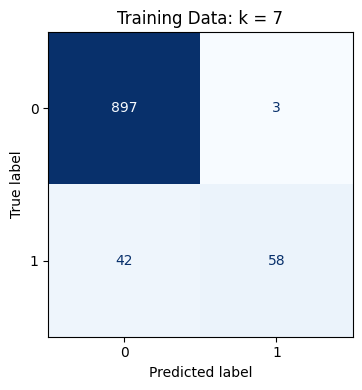

In [22]:
fig, ax = plt.subplots(figsize=(4,4))
plot_confusion_matrix(knn, X_test_norm, y_test, ax, f'Training Data: k = {k}')

# Letter Recognition

The `letter-recognition.csv` data contains information about letter character image features. The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. See the [UCI Letter Recognition page](https://archive.ics.uci.edu/dataset/59/letter+recognition) for more details.

Build a KNN classifier that achieves at least **94%** accuracy on the testing data.

**Create a dataframe for the `letter-recognition.csv` data**

Display the dataframe info and first 5 rows of data.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [23]:
letter_df = pd.read_csv(os.path.join('..', 'data', 'letter-recognition.csv'))
letter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [24]:
letter_df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
1,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
2,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
3,A,2,1,4,2,1,8,1,2,2,7,2,8,2,5,2,7
4,A,3,7,5,5,3,10,4,1,2,8,3,9,2,4,2,7


<h3 style="color:teal"> Expected Output: </h3>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
1,A,3,7,5,5,3,12,2,3,2,10,2,9,2,6,3,8
2,A,3,8,5,6,3,9,2,2,3,8,2,8,2,6,3,7
3,A,2,1,4,2,1,8,1,2,2,7,2,8,2,5,2,7
4,A,3,7,5,5,3,10,4,1,2,8,3,9,2,4,2,7


**Partition the data into training (80%) and testing (20%) sets.**

The `lettr` column is target variable.

<h4 style="color:blue"> Write Your Code Below: </h4>

In [25]:
X = letter_df.drop(columns=['lettr'])
y = letter_df['lettr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)

print('Training Data: ', X_train.shape)
print('Testing Data: ', X_test.shape)

Training Data:  (16000, 16)
Testing Data:  (4000, 16)


<h3 style="color:teal"> Expected Output: </h3>

Training Data:  (16000, 16)
Testing Data:  (4000, 16)


**Build a Decision Tree Classifier with the best parameters using a grid search and a CV of 5.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [41]:
dt = DecisionTreeClassifier(random_state=SEED)

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 10, None]
             }

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

Best Parameters: {'criterion': 'gini', 'max_depth': None}
Best Score: 0.866625


In [43]:
dt_preds = grid_search.predict(X_test)
print('Accuracy :', accuracy_score(y_test, dt_preds))

Accuracy : 0.8685


**Evaluate different k values using accuracy and build a kNN Classifier.**

<h4 style="color:blue"> Write Your Code Below: </h4>

In [45]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

knn_preds3 = knn.predict(X_train)
print('Accuracy :', accuracy_score(y_train, knn_preds3))

Accuracy : 1.0


In [46]:
knn_preds4 = knn.predict(X_test)
print('Accuracy :', accuracy_score(y_test, knn_preds4))

Accuracy : 0.95975


In [58]:
def plot_results(results):
    metrics = list(results_df.columns[1:])
    fig, ax = plt.subplots(1,1, figsize=(8,4))
    for i, metric in enumerate(metrics):
        sns.lineplot(x = results_df['k'], y = results_df[metric], 
                     marker = 'o', ax=ax)
        ax.set_xticks(list(results_df['k']))
        ax.set_xlabel("k Values")
        ax.set_ylabel(metric.capitalize())
        plt.tight_layout()

In [60]:
k_values = range(1, 20, 2)
results = []
cv = 4
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train, y_train, 
                               scoring='accuracy', cv=cv)
    results.append({'k': k, 
                    'accuracy': np.mean(accuracy)
                   })
results_df = pd.DataFrame(results)

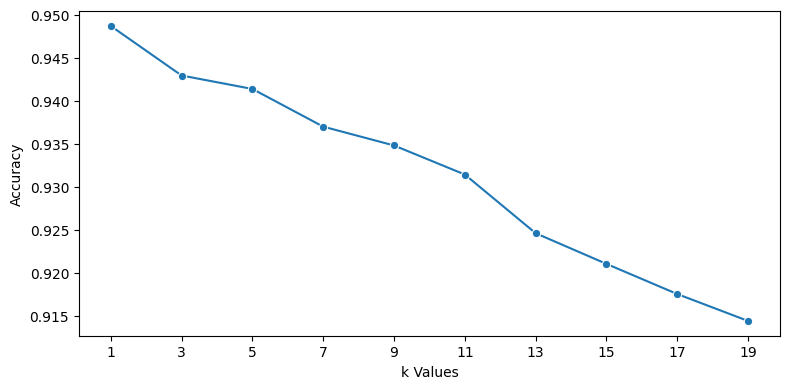

In [59]:
plot_results(results_df)